# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем pandas и прочитаем файл с исходными данными в датафрейм. Для удобства работы обозначим его как df - это позволит переипользовать написанный ранее код.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Изучим содержимое файла, предварительно задав отображение любого количества колонок.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

#### Что можем заметить по общей информации
В данных есть пропущенные значения. Например, в столбце is_apartment пропусков больше половины. Скорее всего данные, которые вносят пользователи при подаче объявления, пропущены самими пользователями. Например, какой-то параметр им неизвестен, а какой-то не сочли нужным указывать. Пропуски в величинах, которые рассчитываются автоматически по геоданным, - это, скорее всего, технический сбой. В дальнейшем рассмотрим подробнее те и другие.

Также есть переменные в некорректном формате. Например, столбец balcony имеет вещественный формат, тогда как балконов может быть только целое число. Возможно, это связано с необходимостью иметь значения NaN, которые для целочисленного формата невозможны.

### Вывод

Был открыт файл с данными и изучена общая информация о нем. Были обнаружены пропущенные значения и данные в некорректном формате. Потребуется предварительная обработка данных.

### Шаг 2. Предобработка данных

#### Пропущенные значения

Посчитаем количество явных пропусков. Составим датафрейм с количеством и долей пропущенных значений.

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [7]:
count_missing = df.isnull().sum()

In [8]:
missing_values_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing, 'count_missing': count_missing})
missing_values_df

,column_name,percent_missing,count_missing
total_images,total_images,0.000000,0
last_price,last_price,0.000000,0
total_area,total_area,0.000000,0
first_day_exposition,first_day_exposition,0.000000,0
rooms,rooms,0.000000,0
ceiling_height,ceiling_height,38.799105,9195
floors_total,floors_total,0.362885,86
living_area,living_area,8.029875,1903
floor,floor,0.000000,0
is_apartment,is_apartment,88.290645,20924


Столбцы с пропущенными значениями определены.

Рассмотрим пропущенные значения в каждом столбце по порядку их в датафрейме.

##### Столбец ceiling_height

Высоту потолка указывают пользователи при размещении объявления. Скорее всего, не все знают высоту потолка или считают нужным ее заполнять, отсюда столько пропусков. Если это случайные пропуски, то их можно заполнить характерными значениями. Проверим, что пропуски в высоте потолка не совпадают с другими столбцами.

In [9]:
df[df['ceiling_height'].isnull()].count()

total_images            9195
last_price              9195
total_area              9195
first_day_exposition    9195
rooms                   9195
ceiling_height             0
floors_total            9118
living_area             8089
floor                   9195
is_apartment             913
studio                  9195
open_plan               9195
kitchen_area            7857
balcony                 4923
locality_name           9160
airports_nearest        6617
cityCenters_nearest     6620
parks_around3000        6620
parks_nearest           2785
ponds_around3000        6620
ponds_nearest           3378
days_exposition         8467
dtype: int64

Связи с пропусками в других столбцах нет. Можем заполнить их медианным значением, чтобы избежать влияния выбросов.

In [10]:
ceiling_height_median = df['ceiling_height'].median()
ceiling_height_median

2.65

In [11]:
df['ceiling_height'].fillna(ceiling_height_median, inplace=True)

In [12]:
df['ceiling_height'].isnull().sum()

0

Готово.

##### Столбец floors_total

Количество этажей - это также информация, которую вносит пользователь. Видимо, не все посчитали нужным заполнять этажность дома в объявлении. Возможно, этаж не указан, если дом одноэтажный? Проверим, на каком этаже расположены квартиры с пропущенным значением этажности.

In [13]:
df[df['floors_total'].isnull()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

Этажи самые разные, поэтому отвергаем гипотезу. 

В дальнейшем нам потребуется категоризировать этажи по принципу "первый", "последний", "другой". Мы не станем заполнять пропуски в количестве этажей характерными значениями, чтобы не повлиять на эту категоризацию.

##### Столбец living_area

Еще одно поле, которое заполняется пользователем. Может быть, жилую площадь не указывают у аппартаментов?

In [14]:
df[df['living_area'].isnull()]['is_apartment'].value_counts()

False    112
True       8
Name: is_apartment, dtype: int64

Гипотеза не подтвердилась, части пропусков соответствует явное укзазание "не аппартаменты". 

Оставим эти пропуски как есть, так как в дальнейшем нам потребуется счиатать соотношение жилой площади к общей, и заполнение пропусков может снизить точность этой оценки.

##### Столбец is_apartment

Пропущен самый большой процент данных. Так как обычно продают все же жилые помещения, то можем предположить, что если отдельно не указано, что у нас аппартаменты, то это не аппартаменты. Заполним пропуски.

In [15]:
df['is_apartment'].fillna(False, inplace=True)

In [16]:
df['is_apartment'].isnull().sum()

0

In [17]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Пропусков в столбце не осталось.

##### Столбец kitchen_area

Площадь кухни невозможно указать, если у вас студия или квартира с открытой планировкой. Проверим.

In [18]:
df[df['kitchen_area'].isnull()]['studio'].value_counts()

False    2129
True      149
Name: studio, dtype: int64

In [19]:
df[df['kitchen_area'].isnull()]['open_plan'].value_counts()

False    2211
True       67
Name: open_plan, dtype: int64

Информация по квартирам без кухни покрывает только часть пропусков. Заполним хотя бы их.

In [20]:
df.loc[(df.loc[:, 'studio'] == 1) | (df.loc[:, 'open_plan'] == 1), 'kitchen_area'] = df['kitchen_area'].fillna(0)

In [21]:
df['kitchen_area'].isnull().sum()

2062

Оставшиеся пропуски скорее всего результат того, что пользователь не знал площадь своей кухни. Мы не станем их заполнять из тех же соображений - чтобы не изменять оценки при дальнейших расчетах.

##### Столбец balcony


Как верно подмечено в тексте задания, пропуск в количестве балконов скорее всего означает отсутствие балконов. Вероятно, пользователи не сочли нужным заполнять это поле, если балконов у них нет. Заполним пропуски нулями.

In [22]:
df['balcony'].fillna(0, inplace=True)

In [23]:
df['balcony'].isnull().sum()

0

Пропущенные значения в столбце с балконами заполнили.

##### Столбец locality_name

Название населенного пункта пропущено в 49 случаях. Мы не сможем его восстановить, но можем поискать причины возникновения этих пропусков.

In [24]:
df[df['locality_name'].isnull()]['cityCenters_nearest'].count()

41

В большей части случаев есть расстояние до центра города. То есть населенный пункт изначально был известен, но потерялся по пути до выгрузки.

##### Столбец airports_nearest 

Расстояние до ближайшего аэропорта - это информация, которая рассчитывается автоматически. Так как все объявления из окрестностей Санкт-Петербурга, аэропорт для всех один и тот же. Мы могли бы взять характерное значение расстояния для каждого населенного пункта. Проверим, что информация по населенным пунктам у нас имеется.

In [25]:
df[df['airports_nearest'].isnull()]['locality_name'].count()

5534

5534 записи из 5542 имеют населенный пункт. Это позволит заполнить подавляющее большинство пропусков.


Заведем словарь, в котором будем хранить характерное расстояние до аэропорта для каждого населенного пункта. Чтобы корректно рассчитать характерное значение, нам нужно не учитывать строки, в которых расстояние не указано.

In [26]:
airports_nearest_median = df.dropna(subset=['airports_nearest']).groupby('locality_name')['airports_nearest'].median()
airports_nearest_median

locality_name
Зеленогорск                72282.0
Колпино                    26232.0
Красное Село               25715.5
Кронштадт                  67850.0
Ломоносов                  48415.5
Павловск                   20529.5
Петергоф                   39231.0
Пушкин                     15766.0
Санкт-Петербург            26757.5
Сестрорецк                 56692.0
поселок Лисий Нос          55930.0
поселок Мурино             51553.0
посёлок Александровская    12896.5
посёлок Белоостров         57769.0
посёлок Левашово           52693.0
посёлок Лисий Нос          54988.5
посёлок Металлострой       25758.0
посёлок Молодёжное         84665.0
посёлок Парголово          53426.0
посёлок Песочный           54831.5
посёлок Петро-Славянка     20605.0
посёлок Понтонный          30642.0
посёлок Репино             61797.5
посёлок Сапёрный           34147.5
посёлок Стрельна           28317.0
посёлок Усть-Ижора         26510.5
посёлок Шушары             17427.0
посёлок Щеглово            61908.0
Name: 

In [27]:
len(airports_nearest_median)

28

Получилось рассчитать медиану только для 28 населенных пунктов. Проверим, что с остальными. Медианное расстояние не превышает 73 км, тогда как Ленинградская область значительно больше. Проверим, возможно остальные населенные пункты слишком далеко от аэропорта.

Посчитаем максимальное расстояние, для которого еще есть аэропорт поблизости.

In [28]:
df['airports_nearest'].max()

84869.0

Выведем на экран несколько населенных пунктов, для которых не указано расстояние до аэропорта и измерим расстояние между ними и аэропортом Пулково на онлайн-карте.

In [29]:
df[df['airports_nearest'].isnull()]['locality_name'].head()

5     городской посёлок Янино-1
8                посёлок Мурино
12                    Сертолово
22              деревня Кудрово
30                     Коммунар
Name: locality_name, dtype: object

Примерные расстояния:
* городской посёлок Янино-1 - 23,5 км
* посёлок Мурино - 30 км
* Сертолово - 39 км
* деревня Кудрово - 19 км
* Коммунар - 20 км

Эти расстояния меньше максимального. Отвергаем гипотезу. 

Значения, полностью пропущенные для большего числа населенных пунктов (хоть и для меньшего числа данных в целом) - это системная ошибка. В жизни нам стоило бы ее зарепортить, а в рамках данного проекта оставим эти пропуски как есть. 

Часть значений мы все же можем восстановить. Напишем функцию, которая будет возвращать характерное расстояние для аэропорта в случае пропуска и существующее значение если пропуска нет. Добавим также конструкцию try-except на случай, если в словаре с рассчитанными медианами не окажется нужного населенного пункта.

In [30]:
def airports_filler(row):
    distance = row['airports_nearest']
    locality = row['locality_name']
    if distance != distance:
        try:
            return airports_nearest_median[locality]
        except:
            return distance
    else:
        return distance

In [31]:
df['airports_nearest'] = df.apply(airports_filler, axis=1)

In [32]:
df['airports_nearest'].isna().sum()

5394

Осталось 5375 записей с пропущенным значением против исходных 5542. Сделали что могли, остальные пропуски оставляем без изменений.

##### Столбец cityCenters_nearest 

Возможно, что нельзя указать центр города, если неизвестен город. Проверим. Вообще поищем взаимосвязи в целом.

In [33]:
df[df['cityCenters_nearest'].isnull()].count()

total_images            5519
last_price              5519
total_area              5519
first_day_exposition    5519
rooms                   5519
ceiling_height          5519
floors_total            5509
living_area             4896
floor                   5519
is_apartment            5519
studio                  5519
open_plan               5519
kitchen_area            4891
balcony                 5519
locality_name           5511
airports_nearest         125
cityCenters_nearest        0
parks_around3000           1
parks_nearest              1
ponds_around3000           1
ponds_nearest              0
days_exposition         4653
dtype: int64

Имя населенного пункта пропущено всего в 8 строках из всех рассмотренных, значит, дело не в нем. Возможно, это объявления в деревнях, где нет именно центра города?

In [34]:
df[df['cityCenters_nearest'].isnull()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

В выводе есть и Санкт-Петербрург. Так как это тоже информация, рассчитанная автоматически, сделаем вывод, что она потерялась в связи с технической ошибкой. Заполнить пропуски не можем.

##### Столбец parks_around3000


Предположим, что если в округе нет парков, то и расстояние до ближайшего не указано. Тогда пропуски в этих двух столбцах совпали бы. Посмотрим.

In [35]:
df[df['parks_around3000'].isnull()]['parks_nearest'].count()

0

Пропуски совпали, принимаем нашу гипотезу как истинную. Тогда отсутствие информации о количестве парков - это ноль парков в округе. Заполним пропуски.

In [36]:
df['parks_around3000'].fillna(0, inplace=True)

In [37]:
df['parks_around3000'].isnull().sum()

0

##### Столбец parks_nearest 

Расстояние до ближайшего парка, когда парка нет - это действительно отсутствие значения. Оставляем NaN. Только убедимся, что парков действительно 0 для всех отсутствующих расстояний.

In [38]:
df[df['parks_nearest'].isnull()]['parks_around3000'].value_counts()

0.0    15620
Name: parks_around3000, dtype: int64

Когда расстояние до ближайшего парка не указано, то парков в округе 0 штук. Так и должно быть, оставляем эти пропуски.

##### Столбец ponds_around3000


Предположим, что история с водоемами такая же, как с парками. Проверим, есть ли у нас расстояние до ближайшего водоема, когда информации о количестве их нет.

In [39]:
df[df['ponds_around3000'].isnull()].count()

total_images            5518
last_price              5518
total_area              5518
first_day_exposition    5518
rooms                   5518
ceiling_height          5518
floors_total            5508
living_area             4895
floor                   5518
is_apartment            5518
studio                  5518
open_plan               5518
kitchen_area            4890
balcony                 5518
locality_name           5510
airports_nearest         124
cityCenters_nearest        0
parks_around3000        5518
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         4653
dtype: int64

Расстояние не указано. Положим, что в заданной округе просто нет водоемов. Заполним пропуски нулями.

In [40]:
df['ponds_around3000'].fillna(0, inplace=True)

In [41]:
df['ponds_around3000'].isnull().sum()

0

Пропуски заполнены.

##### Столбец ponds_nearest


Посмотрим, сколько обычно парков в записях, где нет точного расстояния до ближайшего.

In [42]:
df[df['ponds_nearest'].isnull()]['ponds_around3000'].value_counts()

0.0    14589
Name: ponds_around3000, dtype: int64

Выходит, что когда у нас нет ближайших водоемов, то расстояние до ближайшего - это NaN. Все корректно.

##### Столбец days_exposition

В 13% случаев у нас нет информации о том, как долго объявление размещалось. Возможно, это связано с тем, что квартира не продана либо с тем, что у нас нет даты начала. Проверим оба варианта.

In [43]:
df[df['days_exposition'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,False,False,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


Заявлено, что last_price - это цена на момент снятия с публикации есть. Значит, объявление было снято с публикации в какую-то дату, и она скорее всего известна системе, но в нашей выгрузке ее нет.

In [44]:
df[df['days_exposition'].isnull()].count()

total_images            3181
last_price              3181
total_area              3181
first_day_exposition    3181
rooms                   3181
ceiling_height          3181
floors_total            3172
living_area             2983
floor                   3181
is_apartment            3181
studio                  3181
open_plan               3181
kitchen_area            2992
balcony                 3181
locality_name           3180
airports_nearest        2355
cityCenters_nearest     2315
parks_around3000        3181
parks_nearest           1145
ponds_around3000        3181
ponds_nearest           1216
days_exposition            0
dtype: int64

Дата размещения объявления имеется. 

Таким образом обе гипотезы отвергаем. Количество дней, которые размещалось объявление - это информация, которая рассчитывается независимо от пользователя. Вероятно, она потерялась по пути к нам и восстановить ее нельзя. В жизни мы бы запросили перевыгрузку или дополнительные данные, по которым можно рассчитать количество дней.

#### Формат

Вернемся к методу info, чтобы разобраться с форматом данных.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21637 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Столбец first_day_exposition следует привести к формату даты. 
Количество этажей floors_total и дни размещения days_exposition, вероятно, имеют вещественный формат, чтобы хранить значения NaN. Их формат оставим без изменений.
Столбец is_apartment приобрел булев тип после того, как мы заполнили пропуски. 
Количество балконов, водоемов и парков может быть только целым числом. После заполнения пропусков их можно преобразовать к целочисленному типу. 

Начнем по порядку.

##### Столбец first_day_exposition

Дата внесена как строка - переведем в формат datetime.

In [46]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [47]:
df['first_day_exposition'].dtype

dtype('<M8[ns]')

Привели дату к соответствующему формату, теперь с ней можно будет работать методами pandas.

##### Столбцы balcony, parks_around3000, ponds_around3000        

Приведем к целочисленному формату.

In [48]:
df['balcony'] = df['balcony'].astype('int64')

In [49]:
df['balcony'].dtype

dtype('int64')

In [50]:
df['parks_around3000'] = df['parks_around3000'].astype('int64')

In [51]:
df['parks_around3000'].dtype

dtype('int64')

In [52]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

In [53]:
df['ponds_around3000'].dtype

dtype('int64')

Готово. Еще раз посмотрим на информацию по всему датафрейму.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21637 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around

Скорректировали формат данных насколько это было возможно.

### Вывод

Были выявлены и по возможности заполнены пропуски в данных. Наиболее вероятные причины появления - пропуск информации при вводе пользователем и потеря данных по техническим причинам.
Был скорректирован формат данных там, где это уместно. Причины хранить целочисленные данные в вещественном формате, скорее всего, - это возможность иметь значения NaN. Дата, выгруженная как строка - это скорее всего особенности сбора данных системой.

### Шаг 3. Посчитайте и добавьте в таблицу

##### Цена квадратного метра

Зная общую стоимость квартиры и ее площадь, посчитаем цену за 1 кв.м.

In [55]:
df['square_meter_cost'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_cost
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000


##### День недели, месяц и год публикации объявления

Очень удобно, что столбец first_day_exposition теперь в подходящем формате. Возьмем из него нужные данные.

In [56]:
df['publication_weekday'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek

In [57]:
df['publication_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [58]:
df['publication_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [59]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_cost,publication_weekday,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018


Готово. Дни недели начинаются с 0, а месяцы c 1.

##### Этаж квартиры; варианты — первый, последний, другой

Воспользуемся условным оператором, чтобы определить категорию этажа. В столбце с общим количеством этажей в доме остались пропуски. Если этажность дома неизвестна, отнесем этаж в категорию "другой".

In [60]:
def floor_categorizer(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total:
        return 'последний'
    else:
        return 'другой'

In [61]:
df['floor_category'] = df.apply(floor_categorizer, axis=1)

In [62]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_cost,publication_weekday,publication_month,publication_year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой


Смотреть не очень удобно, но с этажами определились.

##### Соотношение жилой и общей площади, а также отношение площади кухни к общей

Добавим столбцы.

In [63]:
df['living_area_part'] = df['living_area'] / df['total_area']

In [64]:
df['kitchen_area_part'] = df['kitchen_area'] / df['total_area']

In [65]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_cost,publication_weekday,publication_month,publication_year,floor_category,living_area_part,kitchen_area_part
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


Посмотрим, как pandas обошелся с пропущенными значениями.

In [66]:
df['living_area'].isna().sum()

1903

In [67]:
df['living_area_part'].isna().sum()

1903

In [68]:
df['kitchen_area'].isna().sum()

2062

In [69]:
df['kitchen_area_part'].isna().sum()

2062

Оказывается, делить не-число на число можно. 

### Вывод 

К имеющимся данным были добавлены следующие: 
* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Часть рассчитанных переменных имеет пропуски, так как были пропущенные значения в исходных данных, которые для этих расчетов использовались.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 4.1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Соберем интересующие нас параметры в список и построим по нему гистограммы.

In [70]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778e1868d0>]]


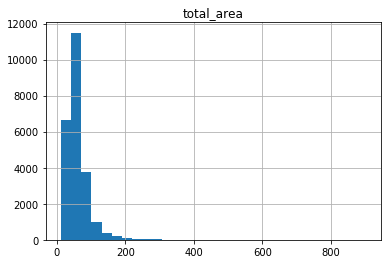

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778e10d198>]]


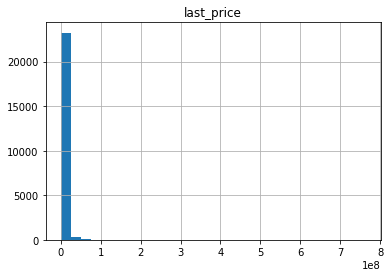

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778e0b8cf8>]]


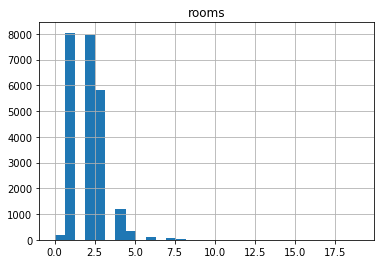

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778dfb4278>]]


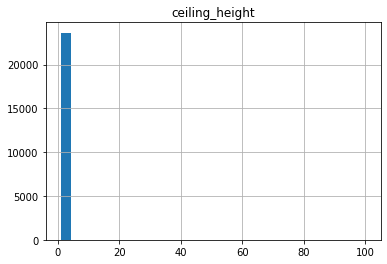

In [73]:
import matplotlib.pyplot as plt 
for column in column_list:
    print(df.hist(column, bins=30))
    plt.show()

Каждая гистограмма имеет пик на минимальных значениях и длинный хвост, что может свидетельствовать о выбросах.

##### Вывод

Были изучены распределения площади, цены, числа комнат, высоты потолков с помощью гистограмм. Все четыре столбца скорее всего имеют выбросы. Графики распредения величин имеют схожую форму, которая напоминает распределение Пуассона. Ранее на курсе нам озвучивали, что такое распределение как правило отражает реальные вещи. 

Из особенностей можно выделить то, что некоторые квартиры имеют 0 комнат.

Также можно выделить распределение высоты потолков, которое имеет пики около нескольких характерных величин.

Нам потребуется рассмотреть эти данные на предмет выбросов.

#### 4.2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Начнем с гистограммы.

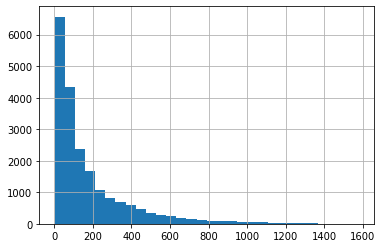

In [74]:
df['days_exposition'].hist(bins=30)

По гистограмме видим, что объявления продаются скорее быстро, чем медленно.

Выведем медиану и среднее арифметическое значения.

In [75]:
df['days_exposition'].median()

95.0

In [76]:
df['days_exposition'].mean()

180.88863436982163

В среднем для продажи требуется 180 дней. При этом медианное время продажи - 95 дней - разница почти в два раза. Обычно такое расхождение тоже сигнализирует о выбросах в данных. Однако гистограмма выглядит достаточно гладкой.

По той же причине, что график распределния времени продажи гладкий, для оценки скорости нетипичных случаев возьмем 5-й и 95-й процентили.

In [77]:
very_fast = df['days_exposition'].quantile(.05)
very_fast

9.0

In [78]:
very_slow = df['days_exposition'].quantile(.95)
very_slow

647.0

Можем считать, что квартира, проданная за 9 дней - это необычайно быстро, а за 2 года - необычайно долго.

##### Вывод

Было рассмотрено распределение времени продажи квартиры, посчитано среднее и медианное время. Две этих величины отличаются почти в 2 раза. Была введена оценка необычно быстрой или необычно медленной продажи - 5-й м 95-й процентили соответственно.

#### 4.3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Выведем числовое описание данных.

In [79]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_cost,publication_weekday,publication_month,publication_year,living_area_part,kitchen_area_part
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21637.000000,23699.000000,18305.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21637.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.464290,0.591080,28864.048184,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,0.564766,0.185484
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.969108,0.959298,12673.634680,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771,0.105368,0.074954
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18641.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.495177,0.132558
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.500000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.171429
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37313.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.637880,0.230916
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


Видим следующие особенности, которые стоит исследовать:
* total_images - максимальное значение в 50 изображений сильно далеко от среднего; 
* last_price - судя по гистаграмме, есть редкие значения;
* total_area - 900 кв.м. - слишком большое значение;
* rooms - странное значение в 0 комнат;
* ceiling_height - потолки высотой 1 м и 100 м не похожи на правду;
* floors_total - высота дома в 60 этажей далеко от среднего;
* living_area - общая площадь в 2 кв.м. и в 409,7 кв.м. не похожи на правду;
* floor - 33 этаж далеко от средних значений;
* kitchen_area - нулевая площадь кухни - это ее отсутствие. А вот 112 кв.м. может быть выбросом;
* balcony - стоит проверить, насколько часто встречаются квартиры с 5 балконами;
* airports_nearest - странное расстоняие в 0 м;
* parks_around3000 - насколько часто встречаются квартиры с 3 парками в районе 3 км?
* parks_nearest - странное значение в 3190 м;
* ponds_around3000 - как часто встречаются квартиры с 3 водоемами в районе 3 км?
* ponds_nearest - ближайший водоем в 13 м от квартиры, не похоже на правду;
* days_exposition - большой разброс с 1 до 1580 дней, возможно здесь есть выбросы.

Зададим список столбцов, по которым хотим построить диаграммы размаха.

In [80]:
column_list = (['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 
                'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'parks_around3000', 
                'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'])

AxesSubplot(0.125,0.125;0.775x0.755)


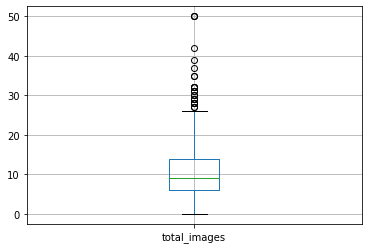

AxesSubplot(0.125,0.125;0.775x0.755)


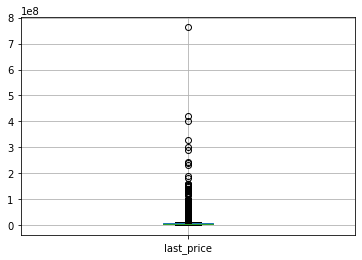

AxesSubplot(0.125,0.125;0.775x0.755)


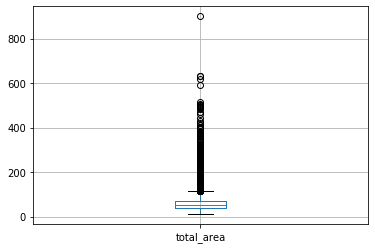

AxesSubplot(0.125,0.125;0.775x0.755)


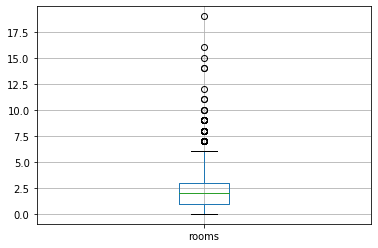

AxesSubplot(0.125,0.125;0.775x0.755)


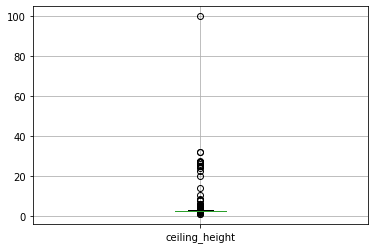

AxesSubplot(0.125,0.125;0.775x0.755)


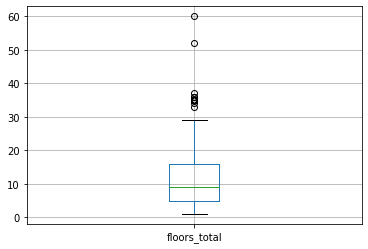

AxesSubplot(0.125,0.125;0.775x0.755)


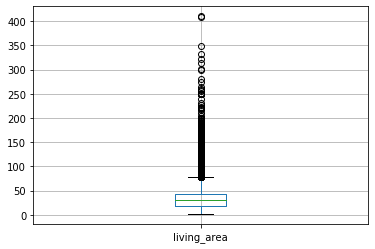

AxesSubplot(0.125,0.125;0.775x0.755)


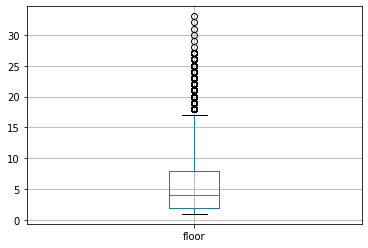

AxesSubplot(0.125,0.125;0.775x0.755)


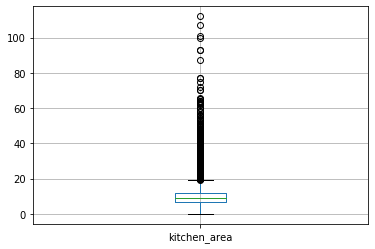

AxesSubplot(0.125,0.125;0.775x0.755)


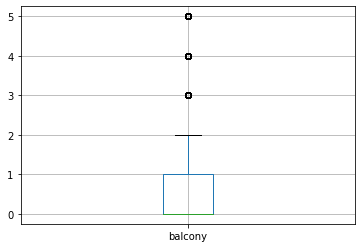

AxesSubplot(0.125,0.125;0.775x0.755)


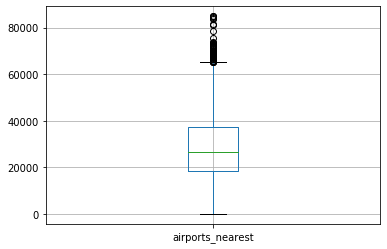

AxesSubplot(0.125,0.125;0.775x0.755)


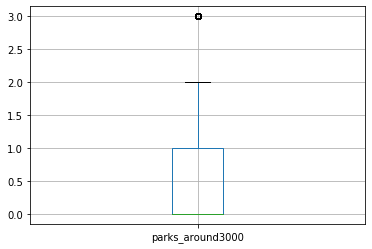

AxesSubplot(0.125,0.125;0.775x0.755)


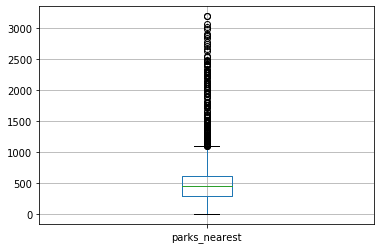

AxesSubplot(0.125,0.125;0.775x0.755)


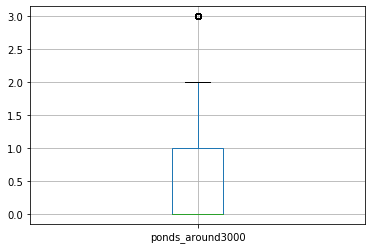

AxesSubplot(0.125,0.125;0.775x0.755)


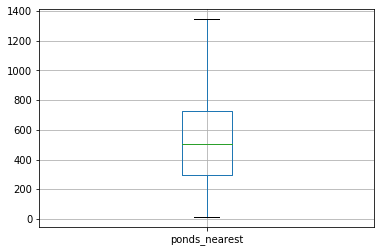

AxesSubplot(0.125,0.125;0.775x0.755)


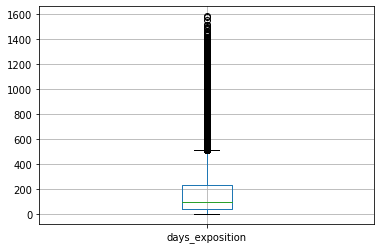

In [81]:
for column in column_list:
    print(df.boxplot(column))
    plt.show()

На большинстве диаграмм значительное количество выбросов. При таком количестве можем считать, что это тоже ценные данные. Чтобы удалить только аномальные значения, воспользуемся 99-м процентилем. Такой выбор обусловлен тем, чтобы не удалять слишком много данных.

В столбце rooms отдельно рассмотрим значения с 0 комнат. Возможно, это такой способ обозначать квартиры-студии?

In [82]:
df.query('studio == True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Часть студий значится с 1 комнатой, часть с 0. То есть мы можем считать студии однокомнатными квартирами.

Посчитаем, кстати, сколько всего записей с 0 комнат.

In [83]:
df.query('rooms == 0')['rooms'].count()

197

Не все квартиры с 0 комнат - студии. Есть еще 59 записей. Возможно, это квартиры с открытой планировкой?

In [84]:
df.query('open_plan == True')['rooms'].value_counts()

0    59
1     3
3     2
5     1
4     1
2     1
Name: rooms, dtype: int64

Это они. Как видим, открытая планировка может подразумевать больше 1 комнаты, но всегда без кухни, как мы выяснили заполняя пропуски. В данном случае 0 комнат также подразумевает 1 комнату.

Получается, все квартиры с количеством комнат 0 на самом деле однокомнатные студии. Выполняем замену.

In [85]:
df['rooms'].where(df['rooms'] > 0, 1, inplace=True)

Диаграмма размаха с новыми значениями.

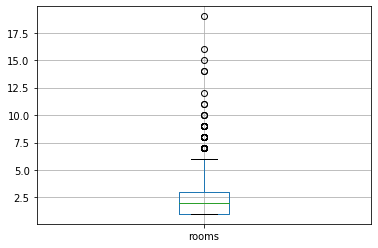

In [86]:
df.boxplot(['rooms'])

Часть выбросов на графике обозначена более жирными точками. Возможно, что это та же группа "дорогостоящих" квартир. Уберем выбросы по процентилю.

В столбце balcony не будем убирать записи. Положим, в особо больших квартирах действительно может быть по 5 балконов.

В столбце airports_nearest тоже не будем убирать записи. Расстояние до аэропорта - величина, рассчитанная на основе геоданных. Нет повода считать большие значения аномальными. Расстояние в 0 км укладывается в усы диаграммы. 

Аналогично со столбцами parks_around3000, ponds_around3000, ponds_nearest, days_exposition.

В столбце parks_nearest не должно быть значений, превышающих 3000 м. Уберем их отдельно. Будем выводить информацию о величине датафрейма после каждого удаления строк, чтобы отслеживать, какую долю данных мы удаляем.

Исходный объем данных:

In [87]:
df.shape

(23699, 29)

In [88]:
df = df.drop(df[df['parks_nearest'] > 3000].index)

In [89]:
df.shape

(23695, 29)

Под фильтр попали 4 строки.

В столбце ceiling_height видим выбросы по обе стороны от усов. Выбросы в большую сторону удалим по процентилю, а выбросы в меньшую по границе усов.

In [90]:
q1_ceiling = df['ceiling_height'].quantile(.25)

In [91]:
q3_ceiling = df['ceiling_height'].quantile(.75)

In [92]:
iqr_ceiling = q3_ceiling - q1_ceiling

In [93]:
min_ceiling = q1_ceiling - 1.5 * iqr_ceiling
min_ceiling

2.45

In [94]:
df = df.drop(df[df['ceiling_height'] < min_ceiling].index)

In [95]:
df.shape

(23651, 29)

Отфильтровали еще 44 строки.

Составим теперь список колонок для зачистки по 95-му процентилю с учетом всего вышеописанного.

In [96]:
columns_for_clearing = (['total_images', 'last_price', 'total_area', 'rooms',
                         'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'days_exposition'])

In [97]:
for column in columns_for_clearing:
    max_normal_value = df[column].quantile(0.99)
    df = df.drop(df[df[column] > max_normal_value].index)

In [98]:
df.shape

(21848, 29)

В итоге мы отфильтровали почти 8% данных.

Построим еще раз диаграммы рахмаха, чтобы оценить однородность данных после зачистки.

AxesSubplot(0.125,0.125;0.775x0.755)


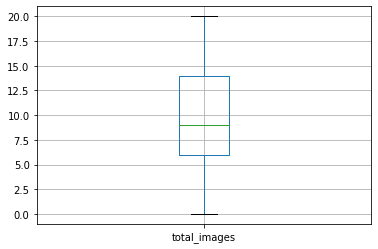

AxesSubplot(0.125,0.125;0.775x0.755)


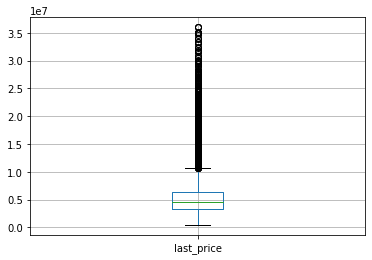

AxesSubplot(0.125,0.125;0.775x0.755)


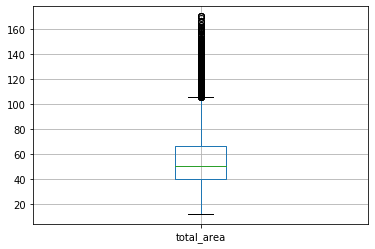

AxesSubplot(0.125,0.125;0.775x0.755)


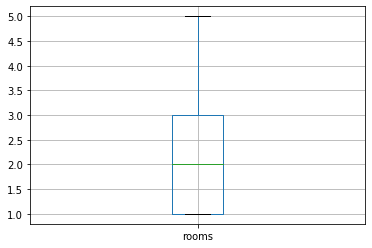

AxesSubplot(0.125,0.125;0.775x0.755)


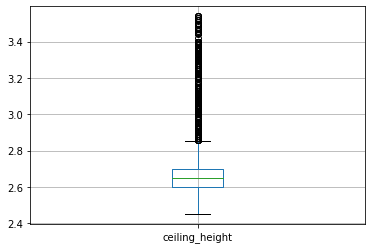

AxesSubplot(0.125,0.125;0.775x0.755)


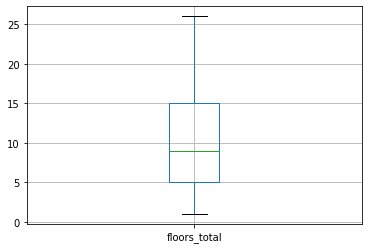

AxesSubplot(0.125,0.125;0.775x0.755)


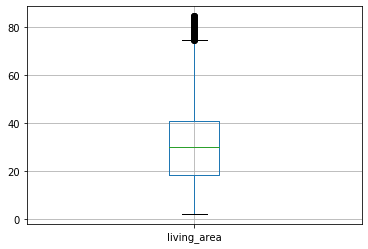

AxesSubplot(0.125,0.125;0.775x0.755)


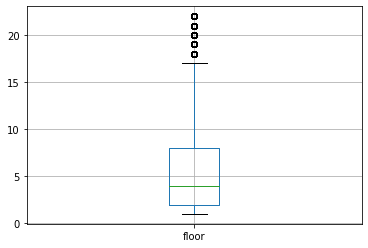

AxesSubplot(0.125,0.125;0.775x0.755)


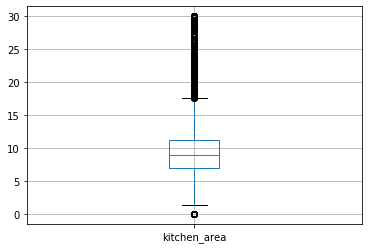

AxesSubplot(0.125,0.125;0.775x0.755)


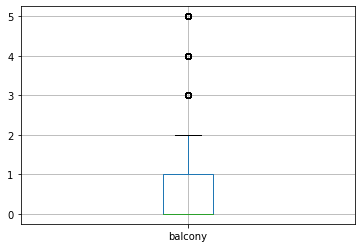

AxesSubplot(0.125,0.125;0.775x0.755)


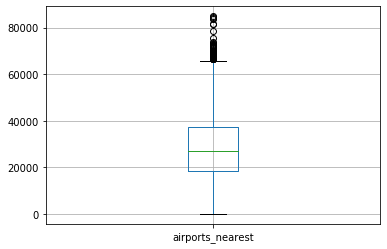

AxesSubplot(0.125,0.125;0.775x0.755)


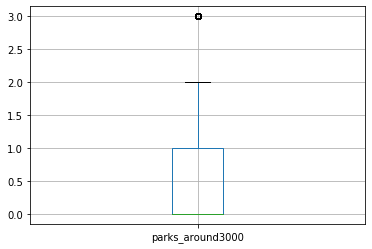

AxesSubplot(0.125,0.125;0.775x0.755)


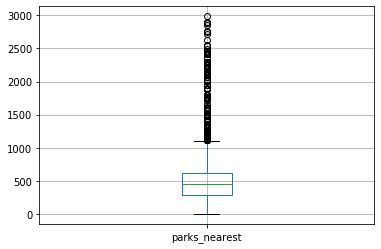

AxesSubplot(0.125,0.125;0.775x0.755)


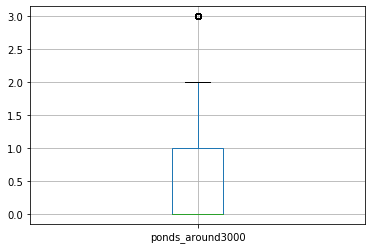

AxesSubplot(0.125,0.125;0.775x0.755)


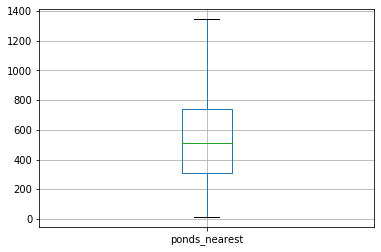

AxesSubplot(0.125,0.125;0.775x0.755)


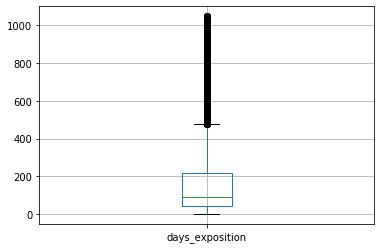

In [99]:
for column in column_list:
    print(df.boxplot(column))
    plt.show()

Графики стали выглядеть читабельнее. Данные стали однороднее - выбросов либо нет вовсе, либо они представляют собой встречающиеся в реальности значения. Также исчезла часть выбросов в столбцах, которые мы не трогали. Например, экстремально большие значения времени продажи квартиры. Вероятно, эти объявления были вполне реальными, но сильно выбивались из общей картины.

Посмотрим еще раз на гистограммы распределения площади, финальной цены, количества комнат и высоты потолков.

In [100]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778e1f7588>]]


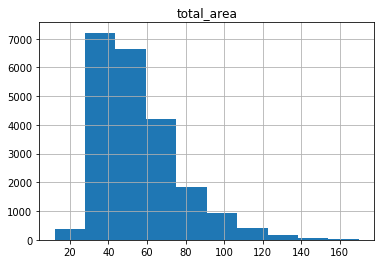

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7790507860>]]


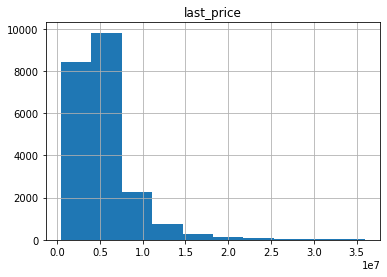

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778debceb8>]]


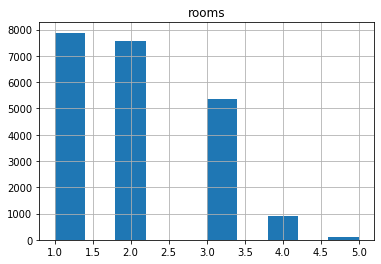

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778e258e48>]]


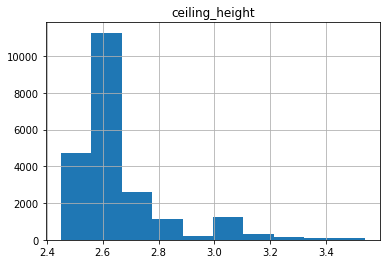

In [101]:
for column in column_list:
    print(df.hist(column))
    plt.show()

Длинные хвосты ушли вместе с аномальными значениями.

##### Вывод

Были удалены объявления с редкими значениями по критерию 99-го процентиля. 

Отдельно были обработаны объявления с особенностями:
* были обработаны аномальные объявления с 0 комнат; 
* были удалены объявления с аномально низкими потолками%;
* были удалены объявления с ошибкой в расчете расстояния до ближайшего парка.

Всего под фильтрацию попало 8% данных.

#### 4.4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Будем рассматривать зависимость стоимости квадратного метра жилья от предложенных параметров. Рассматривать саму цену, за которую продали квартиру, нет смысла, так как она априори растет при увеличении площади, числа комнат и приближении к центру. 

##### Площадь

График совместного распределения площади жилья и стоимости квадратного метра.

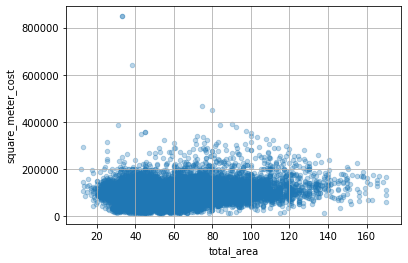

In [102]:
df.plot(y='square_meter_cost', x='total_area', kind='scatter', alpha=0.3, grid=True)

С ростом площади стоимость за единицу площади растет незначительно. Убедимся, что взаимосвязь слабая, посчитав коэффициент корелляции Пирсона.

In [103]:
df['square_meter_cost'].corr(df['total_area'])

0.13549475019875784

Коэффициент положительный, но близок к нулю. Будем считать, что взаимосвязь отсутствует.

##### Количество комнат

Рассмотрим, как влияет на цену количество комнат.

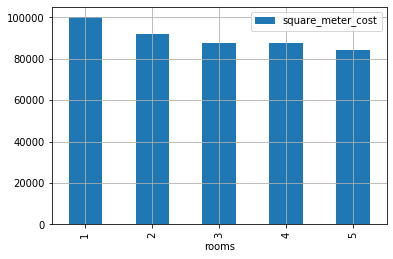

In [104]:
df.groupby(by='rooms').median().plot(y='square_meter_cost', kind='bar', grid=True)

У однокомнатных квартир самая большая стоимость за единицу площади. Стоимость у трех и четырехкомнатных квартир почти одинаковая. В целом чем меньше комнат, тем дороже.

##### Удаленность от центра

Рассмотрим зависимость от близости к центру города. Построим диаграмму рассеяния и сразу обозначим на ней линейную регрессию. Воспользуемся библиотекой seaborn.

In [105]:
import seaborn as sns

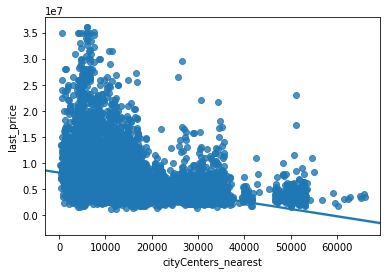

In [106]:
sns.regplot(y='last_price', x='cityCenters_nearest', data=df)

На графике видим отрицательную корреляцию. Убедимся, рассчитав коэффициент Пирсона.

In [107]:
df['square_meter_cost'].corr(df['cityCenters_nearest'])

-0.3813402653598205

С удаленностью от центра города стоимость жилья уменьшается.

##### Этаж

Сгруппируем данные по этажам и построим столбчатую диаграмму.

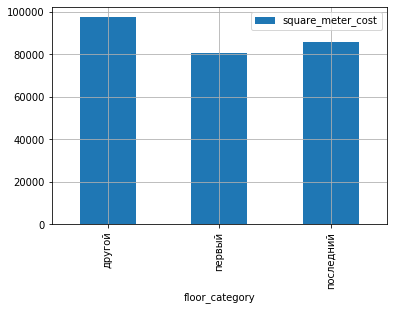

In [108]:
df.groupby(by='floor_category').median().plot(y='square_meter_cost', kind='bar', grid=True)

Квартиры на первом и последнем этажах дешевле, причем первый оценивается ниже.

##### Дата размещения

Рассмотрим, как меняется стоимость жилья в зависимости от времени публикации объявления.

Дни недели:

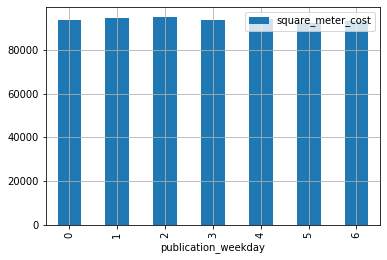

In [109]:
df.groupby(by='publication_weekday').median().plot(y='square_meter_cost', kind='bar', grid=True)

Высота столбиков выглядит одинаковой. Посмотрим поближе.

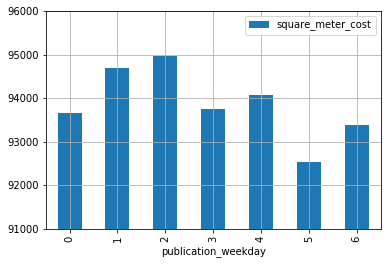

In [110]:
df.groupby(by='publication_weekday').median().plot(y='square_meter_cost', kind='bar', grid=True, ylim=(91000, 96000))

На графике, который мы уже построили от 0 по оси Y, сложно было разглядеть разницу в высоте столбцов, на таком масштабе она заметнее. Минимальная стоимость за единицу площади среди объявлений, выложенных в субботу. Однако разборс значений в 2500 рублей - это разница в примерно 2,5%. Считаем, что стоимость квартиры не зависит от дня недели, в который выложили объявление.

Изучим распределение по месяцам.

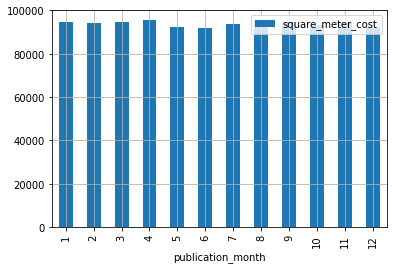

In [111]:
df.groupby(by='publication_month').median().plot(y='square_meter_cost', kind='bar', grid=True)

На первый взгляд в мае и июне квартиры продают дешевле. Посмотрим и здесь поближе.

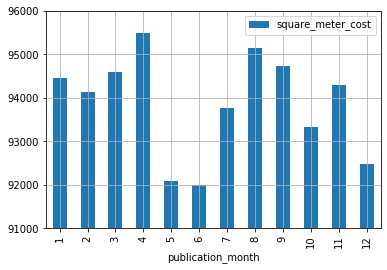

In [112]:
df.groupby(by='publication_month').median().plot(y='square_meter_cost', kind='bar', grid=True, ylim=(91000, 96000))

In [113]:
df['days_exposition'].mean()

166.44971846550544

В мае и июне квартиры действительно самые дешевые, а в апреле и августе - самые дорогие. Однако разброс в 3500 - незначительный. С учетом того, что в среднем время продажи около полугода, и цены продавцы могут менять, мы не можем однозначно установить здесь связь.

Рассмотрим зависимость от года публикации.

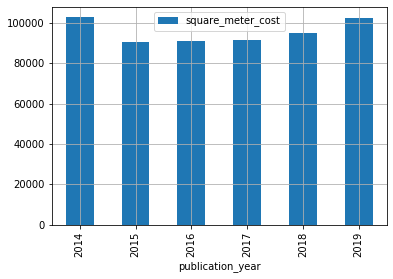

In [114]:
df.groupby(by='publication_year').median().plot(y='square_meter_cost', kind='bar', grid=True)

До 2016-го года цены падали, а после 2017-го начали расти. Группировка по годам позволяет установить такую связь.

##### Вывод

Были исследованы факторы, влияющие на ценообразование квартиры.

Общая площадь жилья и день недели, в который было опубликовано объявление не оказывают влияния на стоимость квадратного метра жилья. Влияние месяца публикации установить не удалось.

Меньшее количество комнат и близость к центру увеличивают стоимость квадратного метра жилья. Квартиры на первых и последних этажах ценятся ниже, чем на других. 

С течением времени стоимость квартир меняется: до 2016-го года цены за единицу площади уменьшались, после снова начали расти. 2019-й год сопоставим с 2014-м.

#### 4.5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Сгруппируем данные по населенным пунктам и посчитаем для них количество объявлений и среднюю стоимость квадратного метра. Выведем 10 населенных пунктов с наибольшим количеством объявлений.

In [115]:
(df.pivot_table(
    index='locality_name', values='square_meter_cost', aggfunc=['count', 'mean'])
 .sort_values(by=('count', 'square_meter_cost'), ascending=False).head(10))

,count,mean
,square_meter_cost,square_meter_cost
locality_name,,
Санкт-Петербург,14252,109995.051998
посёлок Мурино,439,85826.257352
посёлок Шушары,423,78774.719860
Всеволожск,391,68629.763200
Пушкин,342,102539.975859
Колпино,332,75326.364410
Гатчина,302,68800.532761
деревня Кудрово,281,92387.954659


Отсортируем данные по убыванию цены, чтобы визуализировать, как она изменяется в разных населенных пунктах.

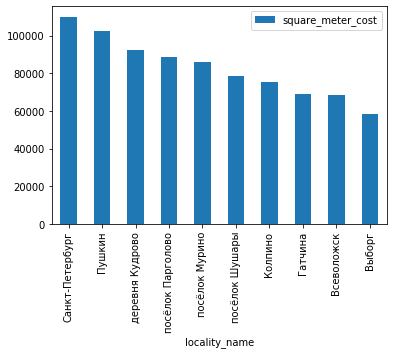

In [116]:
(df.pivot_table(
    index='locality_name', values='square_meter_cost', aggfunc=['count', 'mean'])
 .sort_values(by=('count', 'square_meter_cost'), ascending=False).head(10)
.sort_values(by=('mean', 'square_meter_cost'), ascending=False).plot(y='mean', kind='bar'))

Наибольшая стоимость квадратного метра жилья в Санкт-Петербурге, наименьшая - в Выборге.

##### Вывод

Среди населенных пунктов с наибольшим количеством объявлений были выявлены с самым дорогим жильем (Санкт-Петербург) и с самым дешевым (Выборг).

#### 4.6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Будем использвать срез данных по Санкт-Петербургу.

In [117]:
df_spb = df.query('locality_name == "Санкт-Петербург"')

Добавим в наш срез колонку с расстоянием до центра в километрах, округленным до целого.

In [118]:
df_spb['cityCenters_nearest_km'] = round(df_spb['cityCenters_nearest'] / 1000)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Построим график зависимости цены от удаленности от центра.

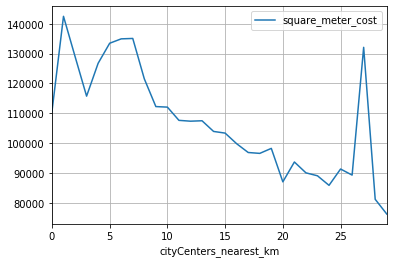

In [119]:
df_spb.groupby(by='cityCenters_nearest_km').mean().plot(y='square_meter_cost', grid=True)

График имеет скачки, однако попробуем оценить тренд. До 6-7 км линия тренда была бы почти горизонтальна, после имеет отрицательный наклон. Приблизим график, чтобы уточнить оценку.

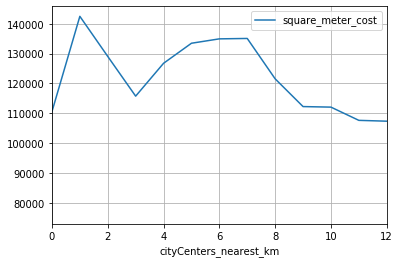

In [120]:
df_spb.groupby(by='cityCenters_nearest_km').mean().plot(y='square_meter_cost', grid=True, xlim=(0, 12))

В приближенном мастштабе видно, что график меняет направление примерно на отметке в 7 км. Примем это значение как границу центральной области.

##### Вывод

На основе данных по стоимости квартир была определена граница центральной области Санкт-Петербруга. Радиус этой области составляет порядка 7 км.

#### 4.7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Выделим квартиры в центре.

In [121]:
df_spb_center = df_spb.query('cityCenters_nearest_km < 7')

Сравним среднюю площадь квартир в центре и по всему городу.

In [122]:
df_spb_center['total_area'].mean()

73.74961851693098

In [123]:
df_spb['total_area'].mean()

57.710563429694076

Сравним цены.

In [124]:
df_spb_center['square_meter_cost'].mean()

130406.26351337033

In [125]:
df_spb['square_meter_cost'].mean()

109995.0519977093

Сравним число комнат. Будем считать среднее арифметическое без округления, чтобы увидеть разницу.

In [126]:
df_spb_center['rooms'].mean()

2.4714959279897126

In [127]:
df_spb['rooms'].mean()

2.041678360931799

Сравним также медианные значения.

In [128]:
df_spb_center['rooms'].median()

2.0

In [129]:
df_spb['rooms'].median()

2.0

В среднем квартиры в центре имеют больше комнат. Медиана здесь - не показательная метрика.

И высоту потолков.

In [130]:
df_spb_center['ceiling_height'].mean()

2.867968281183026

In [131]:
df_spb['ceiling_height'].mean()

2.69268734212742

Квартиры в центре больше и дороже по всем параметрам.

Выделим факторы, влияющие на ценообразование квартир в центре (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравним их с общей картиной по городу.

Рассмотрим влияние количества комнат на цену.

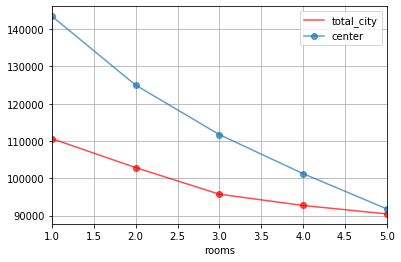

In [132]:
import matplotlib.pyplot as plt
spb = df_spb.pivot_table(index="rooms", values="square_meter_cost", aggfunc="median")
spb_center = df_spb_center.pivot_table(index="rooms", values="square_meter_cost", aggfunc="median")

ax = spb.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, color='red', label='total_city')
spb_center.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, label='center', 
    ax=ax, grid=True, legend=True)

График квартир в центре имеет более крутой наклон - в центре цена сильнее зависит от количества комнат.

Сравним влияние этажа, на котором расположена квартира.

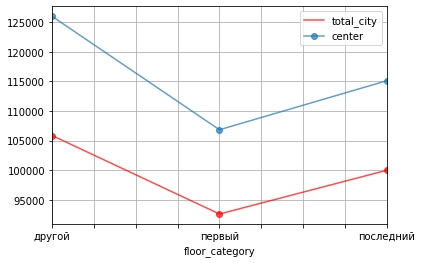

In [133]:
spb = df_spb.pivot_table(index="floor_category", values="square_meter_cost", aggfunc="median")
spb_center = df_spb_center.pivot_table(index="floor_category", values="square_meter_cost", aggfunc="median")

ax = spb.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, color='red', label='total_city')
spb_center.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, label='center', 
    ax=ax, grid=True, legend=True)

Наклон линий отличается не так радикально. Тем не менее, первый и последний этажи в центре ценят еще меньше, чем во всем городе.

Сравним, как влияет на цену удаленность от центра. Будем использовать неокругленное значение cityCenters_nearest. Чтобы не сравнивать два облака диаграмм рассеяния, посчитаем только коэффициенты корелляции Пирсона.

Для центра Санкт-Петербурга:

In [134]:
df_spb_center['square_meter_cost'].corr(df['cityCenters_nearest'])

0.04671897308485001

По городу в целом:

In [135]:
df_spb['square_meter_cost'].corr(df['cityCenters_nearest'])

-0.3436291780135291

Коэффициент города близок к коэффициенту корелляции по всем населенным пунктам в общем. В центре города коэффициент близок к нулю - можем считать, что корелляция отсутствует. Это подтверждает, что центральная область определена корректно.

Сравним, как на ценообразование может влиять дата размещения объявления.

Влияние дня недели:

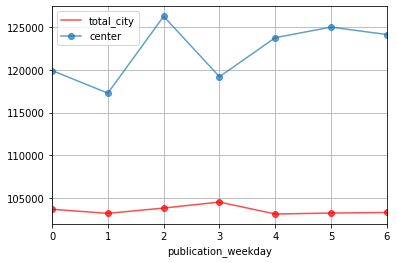

In [136]:
spb = df_spb.pivot_table(index="publication_weekday", values="square_meter_cost", aggfunc="median")
spb_center = df_spb_center.pivot_table(index="publication_weekday", values="square_meter_cost", aggfunc="median")

ax = spb.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, color='red', label='total_city')
spb_center.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, label='center', 
    ax=ax, grid=True, legend=True)

В центре разброс цен больше, но формой графики совсем не похожи. Еще раз утвердим гипотезу о том, что день недели не имеет связи с ценой.

Влияние дня месяца:

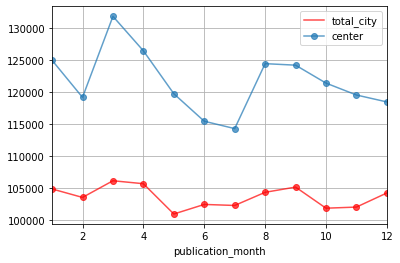

In [137]:
spb = df_spb.pivot_table(index="publication_month", values="square_meter_cost", aggfunc="median")
spb_center = df_spb_center.pivot_table(index="publication_month", values="square_meter_cost", aggfunc="median")

ax = spb.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, color='red', label='total_city')
spb_center.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, label='center', 
    ax=ax, grid=True, legend=True)

Графики имеют мало общего. Подтверждаем, что однозначно определить зависимость цены от месяца размещения нельзя.

Рассмотрим динамику цен по годам.

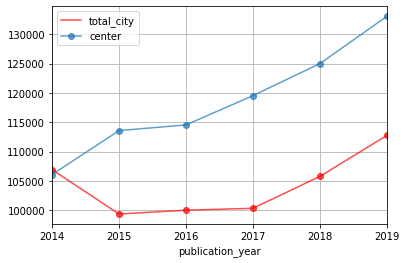

In [138]:
spb = df_spb.pivot_table(index="publication_year", values="square_meter_cost", aggfunc="median")
spb_center = df_spb_center.pivot_table(index="publication_year", values="square_meter_cost", aggfunc="median")

ax = spb.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, color='red', label='total_city')
spb_center.plot(
    kind='line', y='square_meter_cost',  marker='o', alpha=0.7, label='center', 
    ax=ax, grid=True, legend=True)

Странно, что в 2014-м году квартиры в центре стоили дешевле. Возможно, на тот момент центральная зона имела другие границы. Это может быть связано с тем, что города расширяются, а значит, и центр города может расти.

В целом стоимость квартир в центре растет быстрее, чем в общем по городу.

##### Вывод

Было выполнено сравнение сегмента квартир в центре Санкт-Петербурга с квартирами по всему городу.

У квартир центральной области больше площадь, больше комнат, выше потолки и выше цены.

Факторы, влияющие на ценообразование, в центральной области проявляются сильнее. Так, однокомнатные квартиры еще дороже, а квартиры на первых этажах еще дешевле. Рост цен в центральной области также динамичнее. 

### Шаг 5. Общий вывод

Был исследован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Были выявлены и заполнены пропущенные значения в случаях, где это было уместно. Например, отстутствие информации о том, является ли квартира аппартаментами, скорее всего означает, что не является. А отсутствие количества дней, которые размещалось объявление, - это скорее всего техническая ошибка, которую в рамках данной работы восстановить не представлялось возможным.

Были выявлены и устранены редкие и выбивающиеся из выборки записи. Для большинства записей подошел критерий по 99-му перцентилю. Для некоторых параметров аномалии удалялись вручную. Например, парки считались в округе 3 км, но имелись записи с ближайшим парков на расстоянии 3.2 км. Всего было отфильтровано 8% выборки.

Были выявлены параметры, влияющие на рыночную стоимость объектов недвижимости. Это:
* принадлежность к центральной области города;
* число комнат;
* этаж - первый, последний, другой;
* год размещения объявления.